## Markov Chain of Self-Organizing List with Move-to-Front Heuristic

In [2]:
import pandas as pd

# Define the state space
states = ['ABC', 'ACB', 'BAC', 'BCA', 'CAB', 'CBA']

# Define the probabilities for requesting A, B, and C
a, b, c = 0.3, 0.5, 0.2  # You can change these as needed (ensure a + b + c = 1)

# Initialize transition matrix with zeros
transition_matrix = pd.DataFrame(0.0, index=states, columns=states)

# Helper function: move requested item to front of the list
def move_to_front(state, item):
    lst = list(state)
    lst.remove(item)
    new_state = item + ''.join(lst)
    return new_state

# Fill in the transition matrix
for state in states:
    transition_matrix.at[state, move_to_front(state, 'A')] += a
    transition_matrix.at[state, move_to_front(state, 'B')] += b
    transition_matrix.at[state, move_to_front(state, 'C')] += c

# Show the resulting transition matrix
print("Transition Matrix:")
print(transition_matrix)

Transition Matrix:
     ABC  ACB  BAC  BCA  CAB  CBA
ABC  0.3  0.0  0.5  0.0  0.2  0.0
ACB  0.0  0.3  0.5  0.0  0.2  0.0
BAC  0.3  0.0  0.5  0.0  0.0  0.2
BCA  0.3  0.0  0.0  0.5  0.0  0.2
CAB  0.0  0.3  0.0  0.5  0.2  0.0
CBA  0.0  0.3  0.0  0.5  0.0  0.2


## Graph Visualization

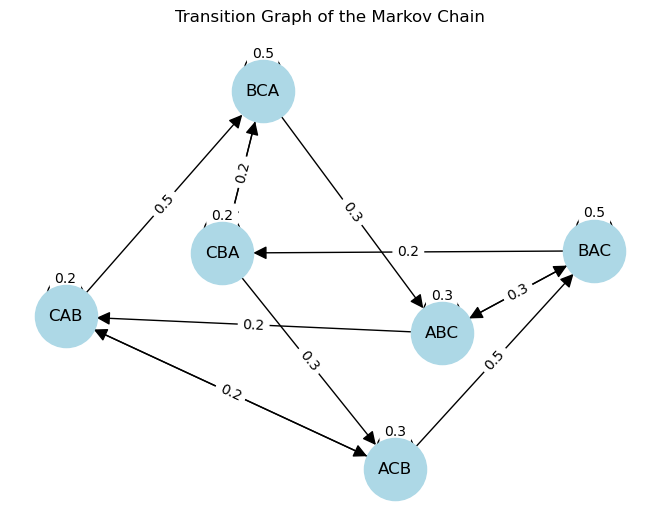

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add edges with weights (probabilities) from the transition matrix
for from_state in transition_matrix.index:
    for to_state in transition_matrix.columns:
        weight = transition_matrix.at[from_state, to_state]
        if weight > 0:
            G.add_edge(from_state, to_state, weight=round(weight, 2))

# Set positions for nodes
pos = nx.spring_layout(G, seed=42)

# Draw nodes and edges
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, arrowsize=20)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Show the plot
plt.title("Transition Graph of the Markov Chain")
plt.show()